# Project Description

# Task:
I have received an analytical task from an international online store. Our predecessor failed to complete it: they launched an A/B test and then quit (to start a watermelon farm in Brazil). They left only the technical specifications and the test results.

# Technical description
-  Test name: recommender_system_test
-  Groups: А (control), B (new payment funnel)
-  Launch date: 2020-12-07
-  Date when they stopped taking up new users: 2020-12-21
-  End date: 2021-01-01
-  Audience: 15% of the new users from the EU region
-  Expected result: within 14 days of signing up, users will show better conversion into product page views (the product_page event), instances of adding items to the shopping cart (product_cart), and purchases (purchase). At each stage of the funnel product_page → product_cart → purchase, there will be at least a 10% increase.
-  Expected number of test participants: 6000

# Description of the data:
- ab_project_marketing_events_us.csv — the calendar of marketing events for 2020
- final_ab_new_users_upd_us.csv — all users who signed up in the online store from December 7 to 21, 2020
- final_ab_events_upd_us.csv — all events of the new users within the period from December 7, 2020 through January 1, 2021
- final_ab_participants_upd_us.csv — table containing test participants
- Structure of ab_project__marketing_events_us.csv:
  -  name — the name of the marketing event
  -  regions — regions where the ad campaign will be held
  -  start_dt — campaign start date
  -  finish_dt — campaign end date
- Structure of final_ab_new_users_upd_us.csv:
  -  user_id
  -  first_date — sign-up date
  -  region
  -  device — device used to sign up
- Structure of final_ab_events_upd_us.csv:
  -  user_id
  -  event_dt — event date and time
  -  event_name — event type name
  -  details — additional data on the event (for instance, the order total in USD for purchase events)
- Structure of final_ab_participants_upd_us.csv:
  -  user_id
  -  ab_test — test name
  -  group — the test group the user belonged to

# Project Goal

Testing changes related to the introduction of an improved recommendation system.

# Project Contents

-  <a href='#the_destination1'>Downloading the data and preparing it for analysis</a>
-  <a href='#the_destination2'>Carry out exploratory data analysis</a>
-  <a href='#the_destination3'>Evaluate the A/B test results</a>
-  <a href='#the_destination4'>Overall conclusion</a>

<a id='the_destination1'></a>
# Step 1. Downloading the data and preparing it for analysis

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
import math as mth

**Information for the "ab_project_marketing_events_us" dataset:**

In [2]:
try:
    ab_project_marketing_events_us = pd.read_csv('ab_project_marketing_events_us.csv')
except:
    ab_project_marketing_events_us = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
ab_project_marketing_events_us.info()
display(ab_project_marketing_events_us.head(14))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In the "ab_project_marketing_events_us" dataset, there are 14 rows and 4 columns. Columns name are "name", "regions", "start_dt" and "finsih_dt".

**Checking datatypes for the "ab_project_marketing_events_us" dataset:**

In [3]:
ab_project_marketing_events_us.dtypes

name         object
regions      object
start_dt     object
finish_dt    object
dtype: object

In the "ab_project_marketing_events_us" dataset, all of the columns are object datatype.

**Converting "start_dt" and "finish_dt" columns from object to datetime type:**

In [4]:
ab_project_marketing_events_us['start_dt'] = pd.to_datetime(ab_project_marketing_events_us['start_dt'], format = '%Y-%m-%d')
ab_project_marketing_events_us['finish_dt'] = pd.to_datetime(ab_project_marketing_events_us['finish_dt'], format = '%Y-%m-%d')
ab_project_marketing_events_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null datetime64[ns]
finish_dt    14 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


I converted "start_dt" and "finish_dt" columns from object to datetime type.

**Checking missing values in the "ab_project_marketing_events_us" dataset:**

In [5]:
ab_project_marketing_events_us.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

There is no missing values in the "ab_project_marketing_events_us" dataset.

**Checking duplicate values in the "ab_project_marketing_events_us" dataset:**

In [6]:
ab_project_marketing_events_us.duplicated().sum()

0

There is no duplicate values in the "ab_project_marketing_events_us" dataset.

**Information for the "final_ab_new_users_upd_us" dataset:**

In [7]:
try:
    final_ab_new_users_upd_us = pd.read_csv("final_ab_new_users_upd_us.csv")
except:
    final_ab_new_users_upd_us = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
final_ab_new_users_upd_us.info()
display(final_ab_new_users_upd_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
user_id       58703 non-null object
first_date    58703 non-null object
region        58703 non-null object
device        58703 non-null object
dtypes: object(4)
memory usage: 1.8+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In the "final_ab_new_users_upd_us" dataset, there are 58703 rows and 3 columns. Columns name are "user_id", "first_date", "region" and "device".

**Checking datatypes for the "final_ab_new_users_upd_us" dataset:**

In [8]:
final_ab_new_users_upd_us.dtypes

user_id       object
first_date    object
region        object
device        object
dtype: object

In the "final_ab_new_users_upd_us" dataset, all of the columns are object data type.

**Converting "first_date" column from object to datetime type:**

In [9]:
final_ab_new_users_upd_us['first_date'] = pd.to_datetime(final_ab_new_users_upd_us['first_date'], format = '%Y-%m-%d')
final_ab_new_users_upd_us.info()
display(final_ab_new_users_upd_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
user_id       58703 non-null object
first_date    58703 non-null datetime64[ns]
region        58703 non-null object
device        58703 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In the "final_ab_new_users_upd_us" dataset, I converted "first_date" column from object to datetime type.

**Checking missing values in the "final_ab_new_users_upd_us" dataset:**

In [10]:
final_ab_new_users_upd_us.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

There is no missing values in the "final_ab_new_users_upd_us" dataset.

**Checking duplicate values in the "final_ab_new_users_upd_us" dataset:**

In [11]:
final_ab_new_users_upd_us.duplicated().sum()

0

There is no duplicate values in the "final_ab_new_users_upd_us" dataset.

**Information for the "final_ab_events_upd_us" dataset:**

In [12]:
try:
    final_ab_events_upd_us = pd.read_csv('final_ab_events_upd_us.csv')
except:
    final_ab_events_upd_us = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
final_ab_events_upd_us.info()
display(final_ab_events_upd_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
user_id       423761 non-null object
event_dt      423761 non-null object
event_name    423761 non-null object
details       60314 non-null float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In the "final_ab_events_upd_us" dataset, there are 423761 rows and 4 columns. Columns name are "user_id", "event_dt", "event_name" and "details".

**Checking datatypes in the "final_ab_events_upd_us" dataset:**

In [13]:
final_ab_events_upd_us.dtypes

user_id        object
event_dt       object
event_name     object
details       float64
dtype: object

In the "final_ab_events_upd_us" dataset, "user_id", "event_dt", "event_name" columns are object datatype and "details" column is float datatype. 

**Converting "event_dt" column from object to datetime type:**

In [14]:
final_ab_events_upd_us['event_dt'] = pd.to_datetime(final_ab_events_upd_us['event_dt'], format ='%Y-%m-%d %H:%M:%S')
final_ab_events_upd_us.dtypes

user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object

I converted "event_dt" column from object to datetime type.

**Checking missing values in the "final_ab_events_upd_us" dataset:**

In [15]:
final_ab_events_upd_us.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In the "final_ab_events_upd_us" dataset, "details" column has 363447 missing values but according to the description of the project those are non-purchase events.

**Checking duplicate values in the "final_ab_events_upd_us" dataset:**

In [16]:
final_ab_events_upd_us.duplicated().sum()

0

In the "final_ab_events_upd_us" dataset, there is no duplicate values.

**Information for "final_ab_participants_upd_us" dataset:**

In [17]:
try:
    final_ab_participants_upd_us = pd.read_csv('final_ab_participants_upd_us.csv')
except:
    final_ab_participants_upd_us = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
final_ab_participants_upd_us.info()
display(final_ab_participants_upd_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
user_id    14525 non-null object
group      14525 non-null object
ab_test    14525 non-null object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In the "final_ab_participants_upd_us" dataset, there are 14525 rows and 3 columns. Columns name are "user_id", "group" and "ab_test".

**Checking datatypes in the "final_ab_participants_upd_us" dataset:**

In [18]:
final_ab_participants_upd_us.dtypes

user_id    object
group      object
ab_test    object
dtype: object

In the "final_ab_participants_upd_us" dataset, all of the columns are obejct type.

**Checking missing values in the "final_ab_participants_upd_us" dataset:**

In [19]:
final_ab_participants_upd_us.isnull().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In the "final_ab_participants_upd_us" dataset, there is no missing values.

**Checking duplicate values in the "final_ab_participants_upd_us" dataset:**

In [20]:
final_ab_participants_upd_us.duplicated().sum()

0

In the "final_ab_participants_upd_us" dataset, there is no duplicate values.

- From "ab_project_marketing_events_us" dataset we get,
  -  In the "ab_project_marketing_events_us" dataset, there are 14 rows and 4 columns. Columns name are "name", "regions", "start_dt" and "finsih_dt".
  -  In the "ab_project_marketing_events_us" dataset, all of the columns are object datatype.
  -  I converted "start_dt" and "finish_dt" columns from object to datetime type.
  -  There is no missing values in the "ab_project_marketing_events_us" dataset.
  -  There is no duplicate values in the "ab_project_marketing_events_us" dataset.
- From the "final_ab_new_users_upd_us" dataset:
  -  In the "final_ab_new_users_upd_us" dataset, there are 58703 rows and 3 columns. Columns name are "user_id", "first_date", "region" and "device".
  -  In the "final_ab_new_users_upd_us" dataset, all of the columns are object data type.
  -  In the "final_ab_new_users_upd_us" dataset, I converted "first_date" column from object to datetime type.
  -  There is no missing values in the "final_ab_new_users_upd_us" dataset.
  -  There is no duplicate values in the "final_ab_new_users_upd_us" dataset.
-  From "final_ab_events_upd_us" dataset
   -  In the "final_ab_events_upd_us" dataset, there are 423761 rows and 4 columns. Columns name are "user_id", "event_dt", "event_name" and "details".
   -  In the "final_ab_events_upd_us" dataset, "user_id", "event_dt", "event_name" columns are object datatype and "details" column is float datatype. 
   -  I converted "event_dt" column from object to datetime type.
   -  In the "final_ab_events_upd_us" dataset, "details" column has 363447 missing values but according to the description of the project those are non-purchase events.
   -  In the "final_ab_events_upd_us" dataset, there is no duplicate values.
- From "final_ab_participants_upd_us" dataset,
   -  In the "final_ab_participants_upd_us" dataset, there are 14525 rows and 3 columns. Columns name are "user_id", "group" and "ab_test".
   -  In the "final_ab_participants_upd_us" dataset, all of the columns are obejct type.
   -  In the "final_ab_participants_upd_us" dataset, there is no missing values.
   -  In the "final_ab_participants_upd_us" dataset, there is no duplicate values.

****

<a id='the_destination2'></a>
# Step 2. Carry out exploratory data analysis

**Determining "ab_project_marketing_events_us" dataset starting and finishing date duration:**

In [21]:
print("ab project marketing events earliest start date", ab_project_marketing_events_us['start_dt'].min())
print("ab project marketing events latest start date", ab_project_marketing_events_us['start_dt'].max())
print("ab project marketing events earliest finishing date", ab_project_marketing_events_us['finish_dt'].min())
print("ab project marketing events latest finishing date", ab_project_marketing_events_us['finish_dt'].max())

ab project marketing events earliest start date 2020-01-25 00:00:00
ab project marketing events latest start date 2020-12-30 00:00:00
ab project marketing events earliest finishing date 2020-02-07 00:00:00
ab project marketing events latest finishing date 2021-01-07 00:00:00


ab project marketing events earliest start date "2020-01-25 00:00:00" and latest start date "2020-12-30 00:00:00". On the other hand, ab project marketing events earliest finishing date "2020-02-07 00:00:00" and "2021-01-07 00:00:00".

**Checking "final_ab_new_users_upd_us" dataset earliest and lastest first date:**

In [22]:
print("final ab new users earliest first date", final_ab_new_users_upd_us['first_date'].min())
print("final ab new users latest first date", final_ab_new_users_upd_us['first_date'].max())

final ab new users earliest first date 2020-12-07 00:00:00
final ab new users latest first date 2020-12-23 00:00:00


Final ab new users earliest first date "2020-12-07 00:00:00" and latest first date "2020-12-23 00:00:00" but according to the technical description of the project we stopped taking new users after "2020-12-21". So we would filer our dataset later.

**Checking the range for "final_ab_events_upd_us" dataset "event date" column:**

In [23]:
print("final ab events earliest event date", final_ab_events_upd_us['event_dt'].min())
print("final ab events latest event date", final_ab_events_upd_us['event_dt'].max())

final ab events earliest event date 2020-12-07 00:00:33
final ab events latest event date 2020-12-30 23:36:33


final ab events earliest event date "2020-12-07 00:00:33" and latest event date "2020-12-30 23:36:33".

**Checking the percentage of new users in the EU region:**

In [24]:
EU_region_final_ab_new_users_upd_us = final_ab_new_users_upd_us.loc[final_ab_new_users_upd_us['region'] == 'EU']
print("Number of new users in the EU region is:", len(EU_region_final_ab_new_users_upd_us))
percentage_of_new_users_in_EU_region = (len(EU_region_final_ab_new_users_upd_us)) / (len(final_ab_new_users_upd_us))*100
print("percentage_of_new_users_in_EU_region is:", percentage_of_new_users_in_EU_region)

Number of new users in the EU region is: 43396
percentage_of_new_users_in_EU_region is: 73.9246716522154


Number of new users in the EU region is 43396. According to the technical description of the project the percentage of new users in the EU region is 15% but in reality the percentage of new users in EU region is 73.93%.

**Selecting only "recommender_system_test" user in the "final_ab_participants_upd_us" dataset:**

In [25]:
recommender_system_test_final_ab_participants_upd_us = final_ab_participants_upd_us.loc[final_ab_participants_upd_us['ab_test'] == 'recommender_system_test']
display(recommender_system_test_final_ab_participants_upd_us.head())

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


There are two types of ab test. One is "interface_eu_test" and the other is "recommender_system_test" but our goal is look into only "recommender_system_test" test. That's why I selected only recommender_system_test for ab test.

**Merging "final_ab_new_users_upd_us" and "recommender_system_test_final_ab_participants_upd_us" dataset:**

In [26]:
merged_data = final_ab_new_users_upd_us.merge(recommender_system_test_final_ab_participants_upd_us, on = 'user_id', how = 'right')
merged_data.info()
display(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3674
Data columns (total 6 columns):
user_id       3675 non-null object
first_date    3675 non-null datetime64[ns]
region        3675 non-null object
device        3675 non-null object
group         3675 non-null object
ab_test       3675 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 201.0+ KB


,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
3,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test
4,29C92313A98B1176,2020-12-07,APAC,Android,B,recommender_system_test


I merged "final_ab_new_users_upd_us" and "recommender_system_test_final_ab_participants_upd_us" dataset.

**Merging "merged_data" and "final_ab_events_upd_us" dataset:**

In [27]:
new_merged_data = merged_data.merge(final_ab_events_upd_us, on = 'user_id', how = 'right')
new_merged_data.info()
display(new_merged_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423761 entries, 0 to 423760
Data columns (total 9 columns):
user_id       423761 non-null object
first_date    23909 non-null datetime64[ns]
region        23909 non-null object
device        23909 non-null object
group         23909 non-null object
ab_test       23909 non-null object
event_dt      423761 non-null datetime64[ns]
event_name    423761 non-null object
details       60314 non-null float64
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 32.3+ MB


,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN


I again merged "merged_data"  and "final_ab_events_upd_us" dataset.

**Counting "event_name" in the "new_merged_data" dataset:**

In [28]:
new_merged_data['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

"new_merged_data" dataset has four types of events named "login", "product_page", "purchase" and "product_cart". "login", "product_page", "purchase" and "product_cart" have number of users 182465, 120862, 60314 and 60120 respectively.

**Determining the average number of events per user:**

In [29]:
new_merged_data.groupby('user_id')['event_name'].count().mean().round()

7.0

The average number of events per user is 7. 

**Separating test A and B for recommender_system_test:**

In [30]:
test_A = new_merged_data[(new_merged_data.group == 'A') & (new_merged_data.ab_test == 'recommender_system_test')]
test_B = new_merged_data[(new_merged_data.group == 'B') & (new_merged_data.ab_test == 'recommender_system_test')]

I separted test A and test B for the recommender_system_test.

**Average number of events per user for the group A:**

In [31]:
test_A.groupby('user_id')['event_name'].count().mean().round()

7.0

The average number of events per user for the group A is 7.

**Average number of events per user for the group B:**

In [32]:
test_B.groupby('user_id')['event_name'].count().mean().round()

6.0

The average number of events per user for the group B is 6.

**Histogram of average number of events per user for the group A:**

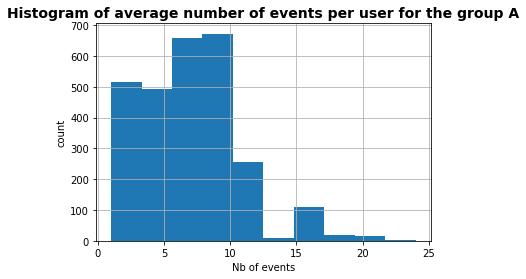

In [33]:
test_A.groupby('user_id')['event_name'].count().hist()
plt.title('Histogram of average number of events per user for the group A',fontsize = 14,fontweight = "bold")
plt.xlabel('Nb of events')
plt.ylabel('count')
plt.show()

The number of events per user for the group A is between 2 to 24.

**Histogram of average number of events per user for the group B:**

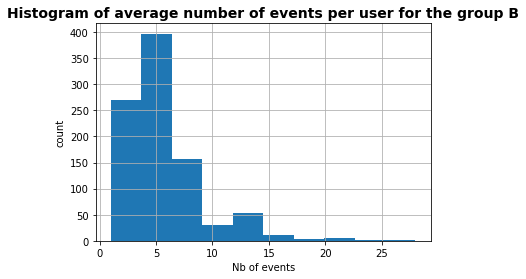

In [34]:
test_B.groupby('user_id')['event_name'].count().hist()
plt.title('Histogram of average number of events per user for the group B',fontsize = 14,fontweight = "bold")
plt.xlabel('Nb of events')
plt.ylabel('count')
plt.show()

The number of events per user for the group B is between 2 to 27.

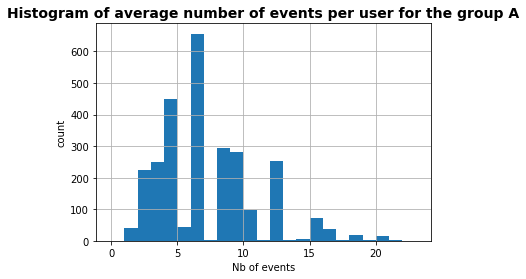

In [35]:
test_A.groupby('user_id')['event_name'].count().hist(
    bins = np.arange(0, test_A.groupby('user_id')['event_name'].count().max(), 1))
plt.title('Histogram of average number of events per user for the group A',fontsize = 14,fontweight = "bold")
plt.xlabel('Nb of events')
plt.ylabel('count')
plt.show()

**Studying conversion at different stages of the funnel for group A:**

In [36]:
(test_A.groupby('event_name').agg({'user_id' : 'nunique'}) / test_B.user_id.nunique()) * 100

,user_id
event_name,
login,296.012931
product_cart,88.793103
product_page,191.810345
purchase,93.965517


For group A event types "login", "product_cart", "product_page" and "purchase" have the percentage of the number of events are 296.01%, 88.8%, 191.82% and 93.97% respectively.

In [37]:
(test_A.groupby('event_name').agg({'user_id' : 'nunique'}) / test_A.user_id.nunique()) * 100

,user_id
event_name,
login,100.000000
product_cart,29.996360
product_page,64.797961
purchase,31.743720


**Studying conversion at different stages of the funnel for group B:**

In [38]:
(test_B.groupby('event_name').agg({'user_id' : 'nunique'}) / test_B.user_id.nunique()) * 100 

,user_id
event_name,
login,99.892241
product_cart,27.478448
product_page,56.357759
purchase,27.586207


For group B event types "login", "product_cart", "product_page" and "purchase" have the percentage of the number of events are 99.9%, 27.47%, 56.35% and 27.59% respectively.

In [39]:
test_B.groupby('event_name').agg({'user_id' : 'nunique'}) / test_B.user_id.nunique()

,user_id
event_name,
login,0.998922
product_cart,0.274784
product_page,0.563578
purchase,0.275862


**Determining the number of events per user distributed equally or not equally among the samples:**

In [40]:
new_merged_data['user_id'].value_counts()/len(new_merged_data)

A3917F81482141F2    0.000085
203773F2A53233A8    0.000076
426330B820B8711A    0.000076
8AEB716C4CD82CA7    0.000076
BA87FD8D70D63CC6    0.000076
                      ...   
704E8E06FE69C691    0.000002
80967EC801FE4C8B    0.000002
B96BD5336FF1686D    0.000002
0FA9C0953DFCF365    0.000002
097672657E333676    0.000002
Name: user_id, Length: 58703, dtype: float64

The number of events per user distributed equally among the samples.

**Raw distribution  of events by date:**

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


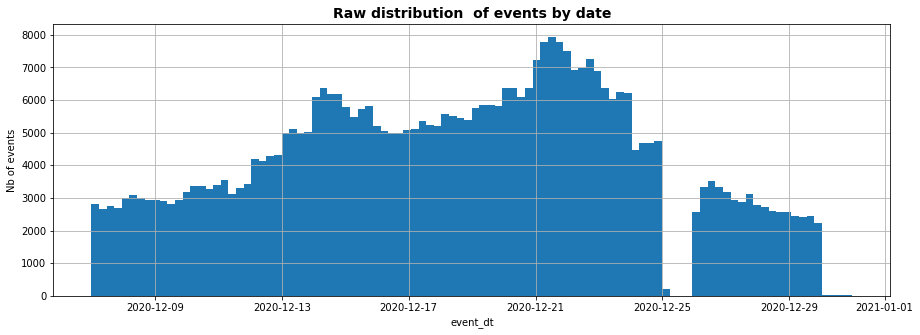

In [41]:
new_merged_data['event_dt'].hist(figsize = (15, 5),bins = 100)
plt.title('Raw distribution  of events by date',fontsize = 14,fontweight = "bold")
plt.xlabel('event_dt')
plt.ylabel('Nb of events')
plt.show()

    The number of more events were distributed between 2020-12-14 and 2020-12-24.

**Selecting events between "2020-12-07" and "2020-12-21" for group A and the recommneder system test:**

In [42]:
for st_date, e_date, name in zip(ab_project_marketing_events_us["start_dt"],\
                                 ab_project_marketing_events_us["finish_dt"],\
                                 ab_project_marketing_events_us["name"]): 
    eves = test_A[(test_A.event_dt >= st_date) & (test_A.event_dt <= e_date)]['event_name'].value_counts()
    if len(eves) != 0:
        print(name)
        print(eves)

Christmas&New Year Promo
login           927
product_page    612
purchase        297
product_cart    278
Name: event_name, dtype: int64


For group A and the recommender system test we found only one event and that is "Christmas&New Year Promo".

**Selecting events between "2020-12-07" and "2020-12-21" for group B and the recommneder system test:**

In [43]:

for st_date, e_date, name in zip(ab_project_marketing_events_us["start_dt"],\
                                 ab_project_marketing_events_us["finish_dt"],\
                                 ab_project_marketing_events_us["name"]): 
    eves = test_B[(test_B.event_dt >= st_date) & (test_B.event_dt <= e_date)]['event_name'].value_counts()
    if len(eves) != 0:
        print(name)
        print(eves)

Christmas&New Year Promo
login           217
product_page    112
purchase         54
product_cart     42
Name: event_name, dtype: int64
CIS New Year Gift Lottery
login           2
product_page    1
product_cart    1
Name: event_name, dtype: int64


-  For group B and the recommender system test we found two events and those are "Christmas&New Year Promo" and "CIS New Year Gift Lottery".
-  For group A and B "Christmas&New Year Promo" event is more popular.

**Filtering "new_merged_data" dataset:**

In [44]:
filtered_new_merged_data = new_merged_data.loc[new_merged_data['first_date'] <= '2020-12-21']
print("Number of new users are till '2020-12-21':", len(filtered_new_merged_data))
filtered_new_merged_data.info()
display(filtered_new_merged_data.head())

Number of new users are till '2020-12-21': 23909
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23909 entries, 0 to 23908
Data columns (total 9 columns):
user_id       23909 non-null object
first_date    23909 non-null datetime64[ns]
region        23909 non-null object
device        23909 non-null object
group         23909 non-null object
ab_test       23909 non-null object
event_dt      23909 non-null datetime64[ns]
event_name    23909 non-null object
details       3210 non-null float64
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.8+ MB


,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN


In the "new_merged_data" dataset, there are new users who joined after "2020-12-21". So I dropped out new users who came after "2020-12-21".

**Check  repartiton of  total users per events:**

In [45]:
unique_users_full_date = new_merged_data['user_id'].nunique()
repartition_of_users = filtered_new_merged_data.groupby('event_name')['user_id'].count().sort_values(ascending=False).reset_index()
repartition_of_users = repartition_of_users.rename(columns={'event_name':'event_types','user_id':'number_of_users'})
repartition_of_users['percentage'] = (repartition_of_users['number_of_users'] / repartition_of_users['number_of_users'].sum()) * 100
display(repartition_of_users)

,event_types,number_of_users,percentage
0,login,10837,45.326028
1,product_page,6702,28.031285
2,purchase,3210,13.425907
3,product_cart,3160,13.216780


After repartition the event "login","product_page", "purchase" and"product_cart" have number of users are 10837, 6702, 3210 and 3160 respectively.

**Checking repartiton of number of users unique per events:**

In [46]:
unique_users_full_date = merged_data['user_id'].nunique()
repartition_of_users_unique = filtered_new_merged_data.groupby('event_name')['user_id'] .nunique().sort_values(ascending=False).reset_index()
repartition_of_users_unique = repartition_of_users_unique.rename(columns={'event_name':'event_types','user_id':'number_of_users'})
repartition_of_users_unique['percentage'] = (repartition_of_users_unique['number_of_users'] / repartition_of_users_unique['number_of_users'].sum()) * 100
repartition_of_users_unique['total _percentage'] = (repartition_of_users_unique['number_of_users'] / unique_users_full_date) * 100
display(repartition_of_users_unique)

,event_types,number_of_users,percentage,total _percentage
0,login,3674,44.892473,99.972789
1,product_page,2303,28.140274,62.666667
2,purchase,1128,13.782991,30.693878
3,product_cart,1079,13.184262,29.360544


After repartition the number of users unique per event "login","product_page", "purchase" and "product_cart" have number of users are 3674, 2303, 1128 and 1079  respectively.

**Calculating the number of users left at each stage & percentage of user's gone:**

In [47]:
tmp = repartition_of_users_unique.reindex([0,1,3,2]).copy()
display(tmp)
tmp['users_left'] = tmp['number_of_users'].diff().fillna(0).astype(int)
tmp['percentage_of_users_gone'] = ( tmp['number_of_users'].pct_change()*100).fillna(0)
display(tmp)

,event_types,number_of_users,percentage,total _percentage
0,login,3674,44.892473,99.972789
1,product_page,2303,28.140274,62.666667
3,product_cart,1079,13.184262,29.360544
2,purchase,1128,13.782991,30.693878


,event_types,number_of_users,percentage,total _percentage,users_left,percentage_of_users_gone
0,login,3674,44.892473,99.972789,0,0.000000
1,product_page,2303,28.140274,62.666667,-1371,-37.316277
3,product_cart,1079,13.184262,29.360544,-1224,-53.148068
2,purchase,1128,13.782991,30.693878,49,4.541242


-  Event type "login" has no users left.
-  The percentage of users left at "product_cart" event is more compared to the other events.

In [48]:
tmp = repartition_of_users_unique.reindex([0,1,3,2]).copy()
display(tmp)

# and re-calculate metrics:
tmp['users_left'] = tmp['number_of_users'].diff().fillna(0).astype(int)
tmp['percentage_of_users_gone'] = ( tmp['number_of_users'].pct_change()*100).fillna(0)
tmp

,event_types,number_of_users,percentage,total _percentage
0,login,3674,44.892473,99.972789
1,product_page,2303,28.140274,62.666667
3,product_cart,1079,13.184262,29.360544
2,purchase,1128,13.782991,30.693878


,event_types,number_of_users,percentage,total _percentage,users_left,percentage_of_users_gone
0,login,3674,44.892473,99.972789,0,0.000000
1,product_page,2303,28.140274,62.666667,-1371,-37.316277
3,product_cart,1079,13.184262,29.360544,-1224,-53.148068
2,purchase,1128,13.782991,30.693878,49,4.541242


-  ab project marketing events earliest start date "2020-01-25 00:00:00" and latest start date "2020-12-30 00:00:00". On the other hand, ab project marketing events earliest finishing date "2020-02-07 00:00:00" and "2021-01-07 00:00:00".
-  Final ab new users earliest first date "2020-12-07 00:00:00" and latest first date "2020-12-23 00:00:00" but according to the technical description of the project we stopped taking new users after "2020-12-21". So we would filer our dataset later.
-  final ab events earliest event date "2020-12-07 00:00:33" and latest event date "2020-12-30 23:36:33".
-  Number of new users in the EU region is 43396. According to the technical description of the project the percentage of new users in the EU region is 15% but in reality the percentage of new users in EU region is 73.93%.
-  There are two types of ab test. One is "interface_eu_test" and the other is "recommender_system_test" but our goal is look into only "recommender_system_test" test. That's why I selected only recommender_system_test for ab test.
-  I merged "final_ab_new_users_upd_us" and "recommender_system_test_final_ab_participants_upd_us" dataset.
-  I again merged "merged_data"  and "final_ab_events_upd_us" dataset.
-  "new_merged_data" dataset has four types of events named "login", "product_page", "purchase" and "product_cart". "login", "product_page", "purchase" and "product_cart" have number of users 182465, 120862, 60314 and 60120 respectively.
-  The average number of events per user is 7. 
-  I separted test A and test B for the recommender_system_test.
-  The average number of events per user for the group A is 7.
-  The average number of events per user for the group B is 6.
-  The number of events per user for the group A is between 2 to 24.
-  The number of events per user for the group B is between 2 to 27.
-  For group A event types "login", "product_cart", "product_page" and "purchase" have the percentage of the number of events are 296.01%, 88.8%, 191.82% and 93.97% respectively.
-  For group B event types "login", "product_cart", "product_page" and "purchase" have the percentage of the number of events are 99.9%, 27.47%, 56.35% and 27.59% respectively.
-  The number of events per user distributed equally among the samples.
-  The number of more events were distributed between 2020-12-14 and 2020-12-24.
-  For group A and the recommender system test we found only one event and that is "Christmas&New Year Promo".
-  For group B and the recommender system test we found two events and those are "Christmas&New Year Promo" and "CIS New Year Gift Lottery".
-  For group A and B "Christmas&New Year Promo" event is more popular.
-  In the "new_merged_data" dataset, there are new users who joined after "2020-12-21". So I dropped out new users who came after "2020-12-21".
-  After repartition the event "login","product_page", "purchase" and "product_cart" have number of users are 10837, 6702, 3210 and 3160 respectively.
-  After repartition the number of users unique per event "login","product_page", "purchase" and "product_cart" have number of users are 3674, 2303, 1128 and 1079  respectively.
-  Event "login" has no users left.
-  The percentage of users left at "product_cart" event is more compared to the other events.

****

<a id='the_destination3'></a>
# Step 3. Evaluate the A/B test results

**Number of users are there in each group:**

In [49]:
new_merged_data.groupby('group')['user_id'].count().reset_index()

,group,user_id
0,A,18627
1,B,5282


Group "A" and "B" have 18627 and 5282 users respectively. 

**Number of users are there in each group for the "new_events" dataset:**

In [50]:
number_of_user_group_one = new_merged_data.groupby('group')['user_id'].nunique().reset_index()
number_of_user_group_one.rename(columns = {'user_id': 'number_of_users'}, inplace=True)
number_of_user_group_one['percentage'] = ((number_of_user_group_one['number_of_users'] / number_of_user_group_one['number_of_users'].sum()) * 100).map("{:,.2f}%".format)
display(number_of_user_group_one)

,group,number_of_users,percentage
0,A,2747,74.75%
1,B,928,25.25%


In the "new_events" dataset, group "A" and "B" have 2747 and 928 users respectively.

**Number of unique users who performed each event:**

In [51]:
number_of_user_experiment = (new_merged_data.pivot_table(index = 'event_name', columns = 'group', values = 'user_id', aggfunc = 'nunique')).reset_index()
number_of_user_experiment = number_of_user_experiment.rename(columns = {'A': 'group_A','B':'group_B'})
display(number_of_user_experiment)

group,event_name,group_A,group_B
0,login,2747,927
1,product_cart,824,255
2,product_page,1780,523
3,purchase,872,256


**Selecting the most popular event:**

In [52]:
group = number_of_user_experiment[number_of_user_experiment['event_name'] == 'login']
display(group)

group,event_name,group_A,group_B
0,login,2747,927


The most popular event name is "login".

**Finding the share in each group: number of users in each group / total  number of users in each  group:**

In [53]:
group['group_A_share'] = (group['group_A'] / number_of_user_group_one.loc[0,'number_of_users'] )* 100
group['group_B_share'] = (group['group_B'] / number_of_user_group_one.loc[1,'number_of_users'] )* 100
display(group)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


group,event_name,group_A,group_B,group_A_share,group_B_share
0,login,2747,927,100.0,99.892241


The share in each group are almost same and that is 100.0.

**Function set to be compiled in a table:**

In [54]:
def z_test(trial_1, success_1, trial_2, success_2, alpha):
    p1 = success_1 / trial_1
    p2 = success_2 / trial_2
    p_combined = (p1 * trial_1 + p2 * trial_2) / (trial_1 + trial_2)
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trial_1 + 1 / trial_2))
    distr = st.norm(0,1)
    return (1 - distr.cdf(abs(z_value))) * 2
newly = new_merged_data
newly.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN


**Total number of unique users in each test group:**

In [55]:
total_number = newly.groupby('group').agg({'user_id':'nunique'})['user_id']
total_number['combined'] = total_number['A'] + total_number['B']
display(total_number)

group
A           2747
B            928
combined    3675
Name: user_id, dtype: int64

Groups "A" and "B" have unique users are 2747 and 928 respectively.

**Creating pivot table:**

In [56]:
hypothese = newly.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')
hypothese['combined'] = hypothese['A'] + hypothese['B']
display(hypothese)

group,A,B,combined
event_name,,,
login,2747,927,3674
product_cart,824,255,1079
product_page,1780,523,2303
purchase,872,256,1128


**Setting significance level:**

In [57]:
hypothese['alpha'] = 0.05
display(hypothese)

group,A,B,combined,alpha
event_name,,,,
login,2747,927,3674,0.05
product_cart,824,255,1079,0.05
product_page,1780,523,2303,0.05
purchase,872,256,1128,0.05


**Hypothsis formulation:**

- Null Hypothesis (H_0) : There is not statistically significant difference between groups "A" and "B" and alpha = 0.05.


- Alternative hypothesis (H_1) : There is a statistically significant difference between groups "A" and "B" and alpha = 0.05.

**Using z-test for checking the statistical difference between the proportions:**

In [58]:
hypothese['p-value_A_B'] = hypothese.apply(lambda x: z_test(total_number['A'], x['A'], total_number['B'], x['B'], hypothese['alpha']), axis=1)
display(hypothese)

group,A,B,combined,alpha,p-value_A_B
event_name,,,,,
login,2747,927,3674,0.05,0.085299
product_cart,824,255,1079,0.05,0.145348
product_page,1780,523,2303,0.05,0.000004
purchase,872,256,1128,0.05,0.017592


For the event type "login", "product_cart" and "purchase" case p-value is greater than the significance level. So there's no reason to reject H₀ and this called type II error or false negative result. On the other hand, event type "product_page" case p-value is lower than the significance level. As a result, there are grounds for rejecting H₀ and this is called type I error or false positive result.

-  Group "A" and "B" have 18627 and 5282 users respectively. 
-  In the "new_events" dataset, group "A" and "B" have 2747 and 928 users respectively.
-  The most popular event name is "login".
-  The share in each group are almost same and that is 100.0.
-  Groups "A" and "B" have unique users are 2747 and 928 respectively.
-  For the event type "login", "product_cart" and "purchase" case p-value is greater than the significance level. So there's no reason to reject H₀ and this called type II error or false negative result. On the other hand, event type "product_page" case p-value is lower than the significance level. As a result, there are grounds for rejecting H₀ and this is called type I error or false positive result.

****

<a id='the_destination4'></a>
# Step 4. Overall conclusion

- From "ab_project_marketing_events_us" dataset we get,
  -  In the "ab_project_marketing_events_us" dataset, there are 14 rows and 4 columns. Columns name are "name", "regions", "start_dt" and "finsih_dt".
  -  In the "ab_project_marketing_events_us" dataset, all of the columns are object datatype.
  -  I converted "start_dt" and "finish_dt" columns from object to datetime type.
  -  There is no missing values in the "ab_project_marketing_events_us" dataset.
  -  There is no duplicate values in the "ab_project_marketing_events_us" dataset.
- From the "final_ab_new_users_upd_us" dataset:
  -  In the "final_ab_new_users_upd_us" dataset, there are 58703 rows and 3 columns. Columns name are "user_id", "first_date", "region" and "device".
  -  In the "final_ab_new_users_upd_us" dataset, all of the columns are object data type.
  -  In the "final_ab_new_users_upd_us" dataset, I converted "first_date" column from object to datetime type.
  -  There is no missing values in the "final_ab_new_users_upd_us" dataset.
  -  There is no duplicate values in the "final_ab_new_users_upd_us" dataset.
-  From "final_ab_events_upd_us" dataset
   -  In the "final_ab_events_upd_us" dataset, there are 423761 rows and 4 columns. Columns name are "user_id", "event_dt", "event_name" and "details".
   -  In the "final_ab_events_upd_us" dataset, "user_id", "event_dt", "event_name" columns are object datatype and "details" column is float datatype. 
   -  I converted "event_dt" column from object to datetime type.
   -  In the "final_ab_events_upd_us" dataset, "details" column has 363447 missing values but according to the description of the project those are non-purchase events.
   -  In the "final_ab_events_upd_us" dataset, there is no duplicate values.
- From "final_ab_participants_upd_us" dataset,
   -  In the "final_ab_participants_upd_us" dataset, there are 14525 rows and 3 columns. Columns name are "user_id", "group" and "ab_test".
   -  In the "final_ab_participants_upd_us" dataset, all of the columns are obejct type.
   -  In the "final_ab_participants_upd_us" dataset, there is no missing values.
   -  In the "final_ab_participants_upd_us" dataset, there is no duplicate values.
   -  ab project marketing events earliest start date "2020-01-25 00:00:00" and latest start date "2020-12-30 00:00:00". On the other hand, ab project marketing events earliest finishing date "2020-02-07 00:00:00" and "2021-01-07 00:00:00".
   
   
   
   
   
-  Final ab new users earliest first date "2020-12-07 00:00:00" and latest first date "2020-12-23 00:00:00" but according to the technical description of the project we stopped taking new users after "2020-12-21". So we would filer our dataset later.
-  final ab events earliest event date "2020-12-07 00:00:33" and latest event date "2020-12-30 23:36:33".
-  Number of new users in the EU region is 43396. According to the technical description of the project the percentage of new users in the EU region is 15% but in reality the percentage of new users in EU region is 73.93%.
-  There are two types of ab test. One is "interface_eu_test" and the other is "recommender_system_test" but our goal is look into only "recommender_system_test" test. That's why I selected only recommender_system_test for ab test.
-  I merged "final_ab_new_users_upd_us" and "recommender_system_test_final_ab_participants_upd_us" dataset.
-  I again merged "merged_data"  and "final_ab_events_upd_us" dataset.
-  "new_merged_data" dataset has four types of events named "login", "product_page", "purchase" and "product_cart". "login", "product_page", "purchase" and "product_cart" have number of users 182465, 120862, 60314 and 60120 respectively.
-  The average number of events per user is 7. 
-  I separted test A and test B for the recommender_system_test.
-  The average number of events per user for the group A is 7.
-  The average number of events per user for the group B is 6.
-  The number of events per user for the group A is between 2 to 24.
-  The number of events per user for the group B is between 2 to 27.
-  For group A event types "login", "product_cart", "product_page" and "purchase" have the percentage of the number of events are 296.01%, 88.8%, 191.82% and 93.97% respectively.
-  For group B event types "login", "product_cart", "product_page" and "purchase" have the percentage of the number of events are 99.9%, 27.47%, 56.35% and 27.59% respectively.
-  The number of events per user distributed equally among the samples.
-  The number of more events were distributed between 2020-12-14 and 2020-12-24.
-  For group A and the recommender system test we found only one event and that is "Christmas&New Year Promo".
-  For group B and the recommender system test we found two events and those are "Christmas&New Year Promo" and "CIS New Year Gift Lottery".
-  For group A and B "Christmas&New Year Promo" event is more popular.
-  In the "new_merged_data" dataset, there are new users who joined after "2020-12-21". So I dropped out new users who came after "2020-12-21".
-  After repartition the event "login","product_page", "purchase" and "product_cart" have number of users are 10837, 6702, 3210 and 3160 respectively.
-  After repartition the number of users unique per event "login","product_page", "purchase" and "product_cart" have number of users are 3674, 2303, 1128 and 1079  respectively.
-  Event "login" has no users left.
-  The percentage of users left at "product_cart" event is more compared to the other events.
 



-  Group "A" and "B" have 18627 and 5282 users respectively. 
-  In the "new_events" dataset, group "A" and "B" have 2747 and 928 users respectively.
-  The most popular event name is "login".
-  The share in each group are almost same and that is 100.0.
-  Groups "A" and "B" have unique users are 2747 and 928 respectively.
-  For the event type "login", "product_cart" and "purchase" case p-value is greater than the significance level. So there's no reason to reject H₀ and this called type II error or false negative result. On the other hand, event type "product_page" case p-value is lower than the significance level. As a result, there are grounds for rejecting H₀ and this is called type I error or false positive result.

****